In [11]:
__depends__ = ['../data/aviso/mdt_cnes_cls2013_global.nc','../data/llc/2160/grid/grid2160.npz',
              '../data/llc/4320/Snapshot_4320_april.npz','../data/llc/4320/Snapshot_4320_october.npz']
__dest__ = ['../writeup/figs/fig1_1.pdf','../writeup/figs/fig1_2.pdf']

In [12]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import cmocean

from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset

## Figure 1a: Kuroshio Extension AVISO mean dynamic topography and ETOPO5 bottom topography on a LCC projection 

In [13]:
# define the Kuroshio Extension map class
m = Basemap(width=12000000/2,height=9000000/3.,projection='lcc',
            resolution=None,lat_1=25.,lat_2=30,lat_0=33,lon_0=155.)

In [14]:
mdt = Dataset(__depends__[0])

In [15]:
lona,lata = np.meshgrid(mdt['lon'][:], mdt['lat'][:])
xaviso,yaviso = m(lona,lata)
adt = mdt['mdt'][:][0]
adt.min(),adt.max()
cadt = np.arange(-1.5,1.5,.1)

In [16]:
# the grid that defines the Kuroshio Extension subregion
grid = np.load(__depends__[1])
xi,yi = m(grid['lon'], grid['lat'])
x = np.array([xi[0,0],xi[-1,0],xi[-1,-1],xi[0,-1],xi[0,0]])
y = np.array([yi[0,0],yi[-1,0],yi[-1,-1],yi[0,-1],yi[0,0]])

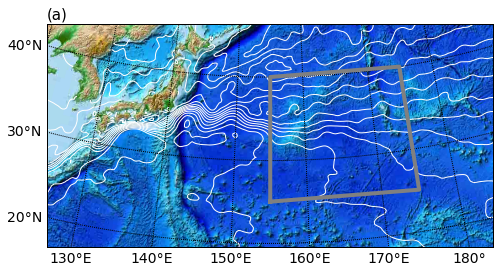

In [17]:
fig = plt.figure(figsize = (10,4))
m.etopo()
m.drawparallels(np.arange(10.,50.,10.),labels=[1,0,0,0],fontsize=14)
m.drawmeridians(np.arange(-140.,181.,10.),labels=[0,0,0,1],fontsize=14)
m.contour(xaviso,yaviso,adt,cadt,colors='w',linewidths=1.)
m.plot(x,y,'.5',linewidth=4)
xt,yt = m(119,43)
plt.text(xt,yt,'(a)',fontsize=15)
plt.savefig(__dest__[0])

## Figures 1b-e: horizontal maps of vertical vorticity and potential density sections in different seasons

In [18]:
m2 = Basemap(projection='merc',llcrnrlat=25.,urcrnrlat=40.,\
            llcrnrlon=155.,urcrnrlon=175.,lat_ts=30.,resolution='c')

In [19]:
snap_april = np.load(__depends__[2])
snap_october = np.load(__depends__[3])
xs,ys = m2(snap_april['lon'], snap_october['lat'])

/Users/crocha/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


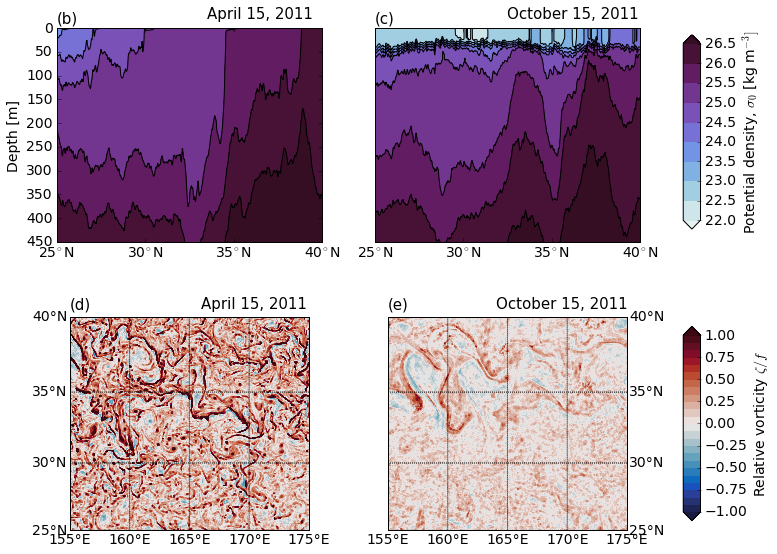

In [21]:
fig = plt.figure(figsize = (12,9))


dec = 2 # use every other data point for vorticity map (file is huge otherwise...)

plt.subplot(223)
ctv = np.linspace(-1.,1.,25)
m2.contourf(xs[::dec,::dec],ys[::dec,::dec],snap_april['vort'][::dec,::dec],ctv,vmin=-1.,vmax=1.,extend='both',cmap=cmocean.cm.balance)
m2.drawcoastlines()
m2.fillcontinents(color='0.5',lake_color=None)
m2.drawparallels(np.arange(-90.,91.,5.),labels=[1,0,0,0],fontsize=14)
m2.drawmeridians(np.arange(-180.,181.,5.),labels=[0,0,0,1],fontsize=14)
xt,yt = m2(155,40.5)
plt.text(xt,yt,'(d)',fontsize=15)
xt,yt = m2(166,40.5)
plt.text(xt,yt,'April 15, 2011',fontsize=15)

plt.subplot(224)
ctv = np.linspace(-1,1.,25)
cs = m2.contourf(xs[::dec,::dec],ys[::dec,::dec],snap_october['vort'][::dec,::dec],
                 ctv,vmin=-1.,vmax=1.,extend='both',cmap=cmocean.cm.balance)
m2.drawcoastlines()
m2.fillcontinents(color='0.5',lake_color=None)
m2.drawparallels(np.arange(-90.,91.,5.),labels=[0,1,0,0],fontsize=14)
m2.drawmeridians(np.arange(-180.,181.,5.),labels=[0,0,0,1],fontsize=14)
xt,yt = m2(155,40.5)
plt.text(xt,yt,'(e)',fontsize=15)
xt,yt = m2(164.,40.5)
plt.text(xt,yt,'October 15, 2011',fontsize=15)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.14, 0.02, 0.3])
fig.colorbar(cs, cax=cbar_ax,label=r'Relative vorticity $\zeta/f$')

plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, hspace=.35, wspace=None)

cs = np.array([22.,22.5,23.,23.5,24.,24.5,25.,25.5,26.,26.5])

plt.subplot(221)
plt.contourf(snap_april['latd'],-snap_april['z'][:],
             snap_april['dens']-1000,cs,vmin=22.,
             vmax=26.5,cmap=cmocean.cm.dense,extend='both')
plt.contour(snap_april['latd'],-snap_april['z'][:],
            snap_april['dens']-1000,cs,colors='k')
plt.ylim(450,0)
plt.ylabel('Depth [m]')
#plt.title('Early Spring')
xticks = [25,30,35,40]
xticklabels = [r'25$\!^\circ$N',r'30$\!^\circ$N',r'35$\!^\circ$N',r'40$\!^\circ$N']
plt.xticks(xticks,xticklabels)

plt.text(25,-10,'(b)',fontsize=15)
plt.text(33.5,-20,'April 15, 2011',fontsize=15)

plt.subplot(222)
cps = plt.contourf(snap_october['latd'],-snap_october['z'][:],
                   snap_october['dens']-1000,cs,vmin=22.,
                   vmax=26.5,cmap=cmocean.cm.dense,extend='both')
plt.contour(snap_october['latd'],-snap_october['z'][:],
            snap_october['dens']-1000,cs,colors='k')


plt.ylim(450,0)
plt.yticks([])
plt.xticks(xticks,xticklabels)

plt.text(25,-10,'(c)',fontsize=15)
plt.text(32.5,-20,'October 15, 2011',fontsize=15)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.59, 0.02, 0.3])
fig.colorbar(cps, cax=cbar_ax,label=r'Potential density, $\sigma_0$ [kg m$^{-3}]$')

plt.savefig(__dest__[1],dpi=80)